In [16]:
import sqlite3
import pandas as pd

merged_df = pd.read_csv('merged_data.csv')

print(merged_df.head())


  Symbol                 Name                  Sector   Price  Price/Earnings  \
0    MMM           3M Company             Industrials  222.89           24.31   
1    AOS      A.O. Smith Corp             Industrials   60.24           27.76   
2    ABT  Abbott Laboratories             Health Care   56.27           22.51   
3   ABBV          AbbVie Inc.             Health Care  108.48           19.41   
4    ACN        Accenture plc  Information Technology  150.51           25.47   

   Dividend Yield  Earnings/Share  52 Week Low  52 Week High    Market Cap  \
0        2.332862            7.92       259.77       175.490  138721055226   
1        1.147959            1.70        68.39        48.925   10783419933   
2        1.908982            0.26        64.60        42.280  102121042306   
3        2.499560            3.29       125.86        60.050  181386347059   
4        1.714470            5.44       162.60       114.820   98765855553   

   ...  Price/Sales  Price/Book  \
0  ...   

In [17]:

financial_columns = ['price', 'price_earnings', 'dividend_yield', 'earnings_share', 
                     'week_52_low', 'week_52_high', 'market_cap', 'ebitda', 
                     'price_sales', 'price_book']
esg_columns = ['total_esg_risk_score', 'environment_risk_score', 'governance_risk_score', 
               'social_risk_score', 'controversy_level', 'controversy_score', 
               'esg_risk_percentile']


Handling missing values


In [18]:


# Check for missing values 
print(merged_df.isnull().sum())


Symbol                     0
Name                       0
Sector                     0
Price                      0
Price/Earnings             1
Dividend Yield             0
Earnings/Share             0
52 Week Low                0
52 Week High               0
Market Cap                 0
EBITDA                     0
Price/Sales                0
Price/Book                 6
SEC Filings                0
total_esg_risk_score      11
environment_risk_score    11
governance_risk_score     11
social_risk_score         11
controversy_level         11
controversy_score         30
esg_risk_percentile       11
dtype: int64


filling missing values with mean


In [19]:
#Fill missing values with mean

merged_df.fillna(merged_df.mean(), inplace=True)


C:\Users\user\AppData\Local\Temp\ipykernel_4388\947231782.py:3: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  merged_df.fillna(merged_df.mean(), inplace=True)


In [20]:


print(merged_df.dtypes)




Symbol                     object
Name                       object
Sector                     object
Price                     float64
Price/Earnings            float64
Dividend Yield            float64
Earnings/Share            float64
52 Week Low               float64
52 Week High              float64
Market Cap                  int64
EBITDA                      int64
Price/Sales               float64
Price/Book                float64
SEC Filings                object
total_esg_risk_score      float64
environment_risk_score    float64
governance_risk_score     float64
social_risk_score         float64
controversy_level          object
controversy_score         float64
esg_risk_percentile        object
dtype: object


In [21]:
print(merged_df.isnull().sum())

Symbol                     0
Name                       0
Sector                     0
Price                      0
Price/Earnings             0
Dividend Yield             0
Earnings/Share             0
52 Week Low                0
52 Week High               0
Market Cap                 0
EBITDA                     0
Price/Sales                0
Price/Book                 0
SEC Filings                0
total_esg_risk_score       0
environment_risk_score     0
governance_risk_score      0
social_risk_score          0
controversy_level         11
controversy_score          0
esg_risk_percentile       11
dtype: int64


EDA


In [22]:
# Descriptive statistics 
descriptive_stats = merged_df.describe()
descriptive_stats

,Price,Price/Earnings,Dividend Yield,Earnings/Share,52 Week Low,52 Week High,Market Cap,EBITDA,Price/Sales,Price/Book,total_esg_risk_score,environment_risk_score,governance_risk_score,social_risk_score,controversy_score
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,3.790000e+02,3.790000e+02,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,109.698971,25.711138,1.944951,4.079710,128.776649,87.771689,5.727402e+10,4.245783e+09,4.112404,13.734129,21.703261,5.863587,6.710326,9.129076,2.045845
std,122.966382,43.459241,1.430412,5.006688,143.144300,89.855867,9.785981e+10,7.641670e+09,3.556269,72.853466,6.824744,5.088963,2.174127,3.601190,0.758142
min,10.060000,-251.530000,0.000000,-19.940000,12.050000,9.700000,4.653994e+09,-5.067000e+09,0.153186,0.660000,7.100000,0.000000,3.000000,0.900000,1.000000
25%,52.425000,16.015000,0.908868,1.655000,61.420000,43.728527,1.447452e+10,9.069020e+08,1.770591,2.135000,16.400000,1.800000,5.300000,6.750000,2.000000
50%,78.660000,19.960000,1.881505,3.090000,92.370000,66.890000,2.575928e+10,1.913000e+09,3.040529,3.820000,21.600000,4.200000,6.200000,9.100000,2.000000
75%,125.610000,25.830000,2.831930,5.445000,147.670000,102.335000,5.213241e+10,4.337900e+09,4.945112,6.740000,26.000000,9.000000,7.600000,11.200000,2.045845
max,1350.500000,520.150000,7.713499,44.090000,1498.000000,824.300000,8.095080e+11,7.938600e+10,20.094294,1318.700000,41.700000,25.000000,19.400000,22.500000,5.000000


In [23]:
# Save the descriptive statistics to a CSV file
descriptive_stats.to_csv('descriptive_statistics.csv', index=False)

Correlation Matrix


Correlation Matrix:
                           Price  Price/Earnings  Dividend Yield  \
Price                   1.000000        0.254286       -0.297068   
Price/Earnings          0.254286        1.000000       -0.208349   
Dividend Yield         -0.297068       -0.208349        1.000000   
Earnings/Share          0.583885        0.023246       -0.150104   
52 Week Low             0.993656        0.238920       -0.296869   
52 Week High            0.979098        0.200673       -0.256849   
Market Cap              0.476646        0.134782       -0.007790   
EBITDA                  0.193805       -0.001577        0.148588   
Price/Sales             0.177908        0.195364       -0.106511   
Price/Book              0.060754        0.013310        0.037717   
total_esg_risk_score   -0.024898       -0.040751        0.049977   
environment_risk_score -0.120372       -0.040038        0.199308   
governance_risk_score   0.056106       -0.013438       -0.033535   
social_risk_score       0.08

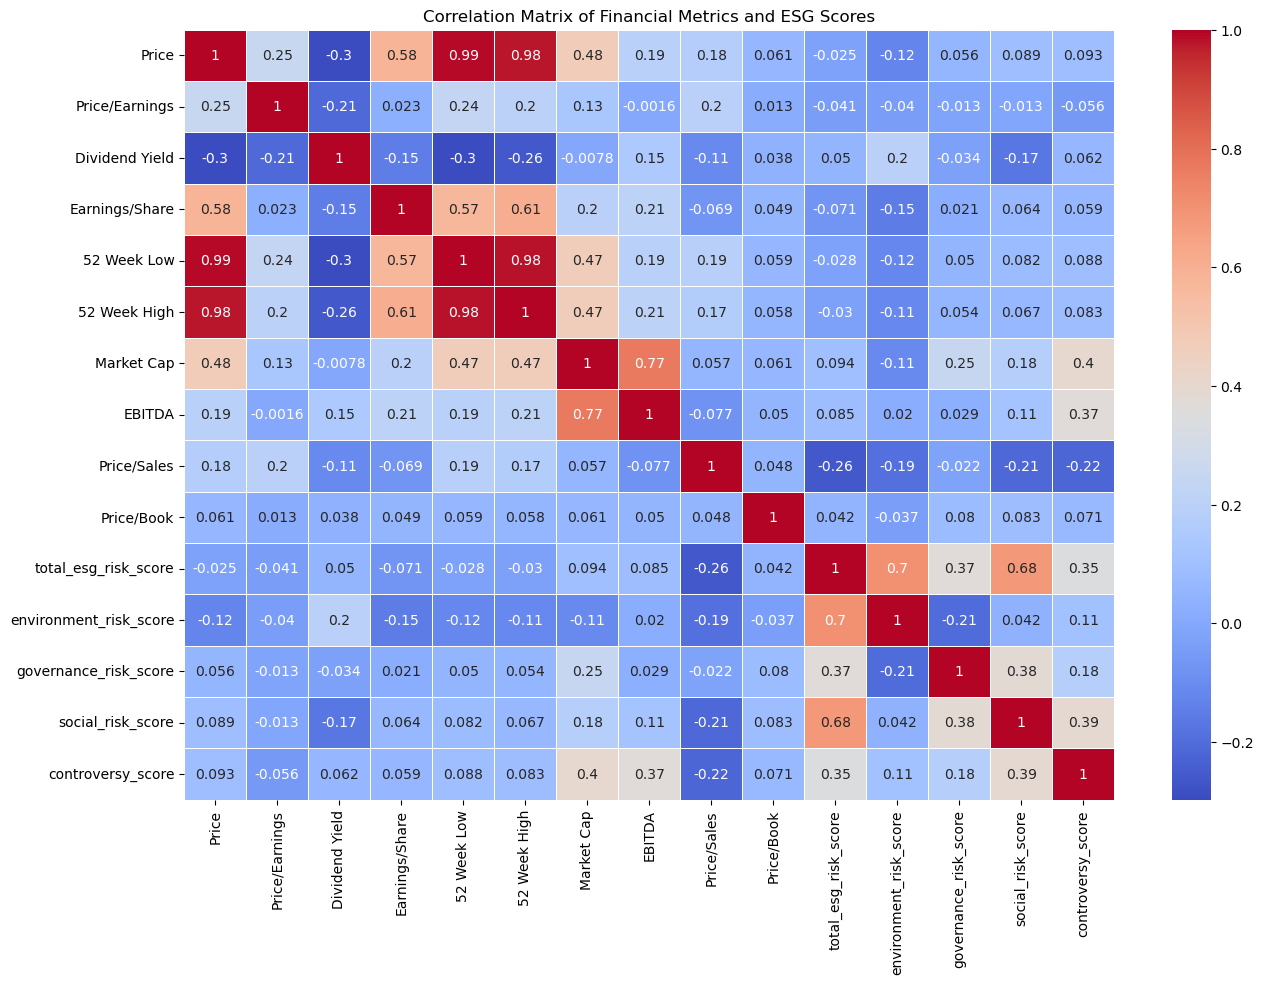

In [24]:

import seaborn as sns
import matplotlib.pyplot as plt



# Define columns to include 
columns_to_include = ['Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_level', 'controversy_score', 'esg_risk_percentile']
      
financial_columns = ['Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings']

esg_columns = ['total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_level', 'controversy_score', 'esg_risk_percentile']


correlation_matrix = merged_df[financial_columns + esg_columns].corr()


print("Correlation Matrix:")
print(correlation_matrix)

correlation_matrix.to_csv('correlation_matrix.csv', index=False)


plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Matrix of Financial Metrics and ESG Scores')
plt.show()


In [25]:
print(merged_df.columns);

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price/Earnings', 'Dividend Yield',
       'Earnings/Share', '52 Week Low', '52 Week High', 'Market Cap', 'EBITDA',
       'Price/Sales', 'Price/Book', 'SEC Filings', 'total_esg_risk_score',
       'environment_risk_score', 'governance_risk_score', 'social_risk_score',
       'controversy_level', 'controversy_score', 'esg_risk_percentile'],
      dtype='object')


In [26]:
merged_df.rename(columns={
    'Earnings/Share': 'Earnings_Share',
    'environment_risk_score': 'Environment_Risk_Score',
    'governance_risk_score': 'Governance_Risk_Score',
    'social_risk_score': 'Social_Risk_Score',
    'total_esg_risk_score': 'Total_ESG_Risk_score',
    'esg_risk_percentile': 'ESG_Risk_Percentile',
    'Price/Earnings': 'Price_Earnings',
    'Dividend Yield': 'Dividend_Yield',
    '52 Week Low': '52_Week_Low',
    '52 Week High': '52_Week_High',
    'Market Cap': 'Market_Cap',
    'Price/Sales': 'Price_Sales',
    'Price/Book': 'Price_Book'
}, inplace=True)



In [27]:
print(merged_df.columns)

Index(['Symbol', 'Name', 'Sector', 'Price', 'Price_Earnings', 'Dividend_Yield',
       'Earnings_Share', '52_Week_Low', '52_Week_High', 'Market_Cap', 'EBITDA',
       'Price_Sales', 'Price_Book', 'SEC Filings', 'Total_ESG_Risk_score',
       'Environment_Risk_Score', 'Governance_Risk_Score', 'Social_Risk_Score',
       'controversy_level', 'controversy_score', 'ESG_Risk_Percentile'],
      dtype='object')
